# Exercise 1

In [4]:
import numpy as np
import matplotlib . pyplot as plt
import random

In [5]:
def get_column ( data , index ) :
    data = np.array(data)
    return data[:,index]

data = np . genfromtxt ('advertising.csv' , delimiter =',', skip_header =1) . tolist ()
data = np.array(data)
data[:,0]

array([230.1,  44.5,  17.2, 151.5, 180.8,   8.7,  57.5, 120.2,   8.6,
       199.8,  66.1, 214.7,  23.8,  97.5, 204.1, 195.4,  67.8, 281.4,
        69.2, 147.3, 218.4, 237.4,  13.2, 228.3,  62.3, 262.9, 142.9,
       240.1, 248.8,  70.6, 292.9, 112.9,  97.2, 265.6,  95.7, 290.7,
       266.9,  74.7,  43.1, 228. , 202.5, 177. , 293.6, 206.9,  25.1,
       175.1,  89.7, 239.9, 227.2,  66.9, 199.8, 100.4, 216.4, 182.6,
       262.7, 198.9,   7.3, 136.2, 210.8, 210.7,  53.5, 261.3, 239.3,
       102.7, 131.1,  69. ,  31.5, 139.3, 237.4, 216.8, 199.1, 109.8,
        26.8, 129.4, 213.4,  16.9,  27.5, 120.5,   5.4, 116. ,  76.4,
       239.8,  75.3,  68.4, 213.5, 193.2,  76.3, 110.7,  88.3, 109.8,
       134.3,  28.6, 217.7, 250.9, 107.4, 163.3, 197.6, 184.9, 289.7,
       135.2, 222.4, 296.4, 280.2, 187.9, 238.2, 137.9,  25. ,  90.4,
        13.1, 255.4, 225.8, 241.7, 175.7, 209.6,  78.2,  75.1, 139.2,
        76.4, 125.7,  19.4, 141.3,  18.8, 224. , 123.1, 229.5,  87.2,
         7.8,  80.2,

In [6]:
def prepare_data ( file_name_dataset ) :
    data = np . genfromtxt ( file_name_dataset , delimiter =',', skip_header =1) . tolist ()
    N = len( data ) 
    # get tv ( index =0)
    tv_data = get_column ( data , 0)    
    # get radio ( index =1)
    radio_data = get_column ( data , 1) 
    # get newspaper ( index =2)
    newspaper_data = get_column ( data , 2)

    # get sales ( index =3)
    sales_data = get_column ( data , 3) 
    # building X input and y output for training
    X = [ tv_data , radio_data , newspaper_data ]
    y = sales_data
    return X , y

In [7]:
X , y = prepare_data ('advertising.csv')
list = [ sum ( X [0][:5]) , sum ( X [1][:5]) , sum ( X [2][:5]) , sum ( y [:5]) ]
print ( list )

[624.1, 175.10000000000002, 300.5, 78.9]


# Exercise 2

In [8]:
def compute_gradient_wi (xi , y , y_hat ) : 
    dl_dwi = 2* xi* (y_hat-y)
    return dl_dwi

def  compute_loss_mse(y , y_hat):
    return (y-y_hat)**2

def update_weight_b (b , dl_db , lr ) :
    b = b - lr* dl_db
    return b

def compute_gradient_b (y , y_hat ) :
    dl_db = (y_hat-y)
    return 2* dl_db 

def update_weight_wi ( wi , dl_dwi , lr ) : 
    wi = wi - lr* dl_dwi
    return wi

def implement_linear_regression ( X_data , y_data , epoch_max = 50 , lr = 0.00001):
    losses = []

    w1 , w2 , w3 , b = initialize_params ()

    N = len( y_data )
    for epoch in range ( epoch_max ) :
        for i in range ( N ) :
        # get a sample
            x1 = X_data [0][ i ]
            x2 = X_data [1][ i ]
            x3 = X_data [2][ i ]    
            y = y_data [ i ]    
            # compute output
            y_hat = predict ( x1 , x2 , x3 , w1 , w2 , w3 , b ) 
            # compute loss
            loss = compute_loss_mse (y , y_hat )    
            # compute gradient w1 , w2 , w3 , b
            dl_dw1 = compute_gradient_wi ( x1 , y , y_hat )
            dl_dw2 = compute_gradient_wi ( x2 , y , y_hat )
            dl_dw3 = compute_gradient_wi ( x3 , y , y_hat )
            dl_db = compute_gradient_b (y , y_hat )

            w1 = update_weight_wi ( w1 , dl_dw1 , lr )
            w2 = update_weight_wi ( w2 , dl_dw2 , lr )
            w3 = update_weight_wi ( w3 , dl_dw3 , lr )
            b = update_weight_b (b , dl_db , lr )           
            # logging
            losses . append ( loss )

    return ( w1 , w2 , w3 ,b , losses )

def initialize_params () :
    w1 , w2 , w3 , b = (0.016992259082509283 , 0.0070783670518262355 ,-0.002307860847821344 , 0)
    return w1 , w2 , w3 , b

def predict ( x1 , x2 , x3 , w1 , w2 , w3 , b ) :   
    return x1*w1 + x2*w2 + x3*w3+ b

## Question 2

In [9]:
y = predict ( x1 =1 , x2 =1 , x3 =1 , w1 =0 , w2 =0.5 , w3 =0 , b =0.5)
print ( y )

1.0


## Question 3

In [10]:
def  compute_loss_mse(y , y_hat):
    return (y-y_hat)**2

In [11]:
l = compute_loss_mse ( y_hat =1 , y =0.5)
print ( l )

0.25


## Question 4

In [12]:
def compute_gradient_wi (xi , y , y_hat ) : 
    # your code here ****************************   
    dl_dwi = 2* xi* (y_hat-y)
    return dl_dwi 

In [13]:
g_wi = compute_gradient_wi ( xi =1.0 , y =1.0 , y_hat =0.5)
print ( g_wi )

-1.0


## Question 5

In [14]:
def compute_gradient_b (y , y_hat ) :
    dl_db = (y_hat-y)
    return 2* dl_db 

In [15]:
g_b = compute_gradient_b ( y =2.0 , y_hat =0.5)
print ( g_b )

-3.0


## Question 6

In [16]:
def update_weight_wi ( wi , dl_dwi , lr ) : 
    wi = wi - lr* dl_dwi
    return wi

In [17]:
after_wi = update_weight_wi ( wi =1.0 , dl_dwi = -0.5 , lr = 0.00001)
print ( after_wi )

1.000005


## Question 7

In [18]:
def update_weight_b (b , dl_db , lr ) :

   # your code here ****************************
    b = b - lr* dl_db
    return b

In [19]:
after_b = update_weight_b ( b =0.5 , dl_db = -1.0 , lr = 0.00001)
print ( after_b )

0.50001


In [20]:
( w1 , w2 , w3 ,b , losses ) = implement_linear_regression (X , y )
plt.plot(losses [:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

TypeError: object of type 'float' has no len()

# Exercise 8

In [22]:
X , y = prepare_data ( 'advertising.csv')
( w1 , w2 , w3 ,b , losses ) = implement_linear_regression (X , y ,epoch_max = 50)
print ( w1 , w2 , w3 )

0.07405984066396477 0.15917360263437663 0.017561197559948935


# Exercise 9

In [21]:
tv = 19.2
radio = 35.9
newspaper = 51.3
X , y = prepare_data ('advertising.csv')
(w1 , w2 , w3 ,b , losses ) = implement_linear_regression(X , y , epoch_max =50 , lr =0.00001)
sales = predict ( tv , radio , newspaper , w1 , w2 , w3 , b )
print (f'predicted sales is { sales }')

predicted sales is 8.176413319549823


# Exercise 10

In [27]:
def implement_linear_regression_nsamples ( X_data , y_data , epoch_max =50 , lr =0.00001)-> None:
    losses = []

    w1 , w2 , w3 , b = initialize_params ()
    N = len( y_data )

    for epoch in range ( epoch_max ) :

        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0
        for i in range ( N ) :
        # get a sample
            x1 = X_data [0][ i ]
            x2 = X_data [1][ i ]
            x3 = X_data [2][ i ]
            y = y_data [ i ]
            # compute output
            y_hat = predict ( x1 , x2 , x3 , w1 , w2 , w3 , b )
            # compute loss
            loss = compute_loss_mse (y , y_hat )
            loss_total+= loss
            
            dl_dw1 = compute_gradient_wi ( x1 , y , y_hat )
            dw1_total+= dl_dw1

            dl_dw2 = compute_gradient_wi ( x2 , y , y_hat )
            dw2_total += dl_dw2

            dl_dw3 = compute_gradient_wi ( x3 , y , y_hat )
            dw3_total += dl_dw3

            dl_db = compute_gradient_b (y , y_hat )
            db_total += dl_db

        losses.append(loss_total / N)

        w1 = update_weight_wi ( w1 , dw1_total/N , lr )
        w2 = update_weight_wi ( w2 , dw2_total/N , lr )
        w3 = update_weight_wi ( w3 , dw3_total/N , lr )
        b = update_weight_b (b , db_total/N , lr )     

    return w1 , w2 , w3 ,b , losses

[172.98395547828923, 39.4081674745134, 18.15746728564735, 14.634633779162357, 13.913880074022757, 13.640049637323427, 13.441395294810789, 13.259118517018994, 13.083802587178743, 12.913826664416215, 12.748804182322559, 12.58854742072041, 12.432904005847659, 12.281730988201284, 12.134890631437667, 11.992249630675893, 11.853678875589457, 11.719053303032835, 11.588251767260099, 11.461156916275085, 11.33765507239911, 11.217636116651946, 11.100993376782947, 10.987623518830576, 10.877426442098113, 10.77030517743778, 10.666165788738786, 10.564917277518694, 10.466471490519933, 10.370743030217112, 10.277649168143098, 10.187109760945372, 10.099047169086274, 10.013386178104167, 9.930053922354572, 9.848979811153313, 9.770095457245782, 9.69333460752933, 9.61863307595747, 9.545928678557278, 9.475161170493593, 9.406272185115144, 9.339205174920474, 9.273905354383018, 9.210319644576826, 9.148396619546123, 9.088086454363877, 9.029340874825948, 8.972113108729593, 8.916357838686066, 8.86203115641928, 8.809

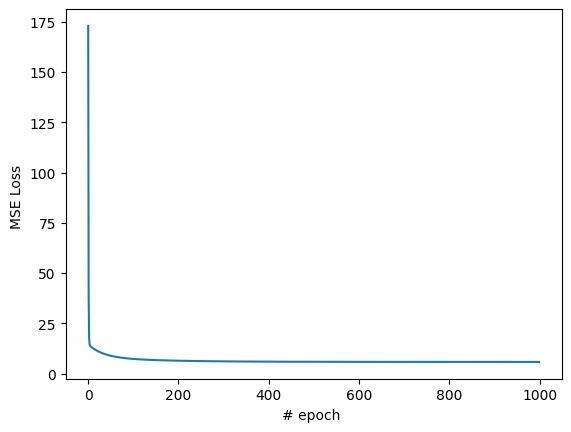

In [28]:
( w1 , w2 , w3 ,b , losses ) = implement_linear_regression_nsamples (X , y ,epoch_max =1000 ,lr =0.00001)
print (losses)
plt.plot ( losses )
plt.xlabel ("# epoch ")
plt.ylabel ("MSE Loss ")
plt.show ()